In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from scipy.stats import stats
%matplotlib inline
from IPython.display import display
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
cwd = os.getcwd()

In [2]:
# read the new dataframe back into memory
df = pd.read_csv(os.path.join(cwd, "Citibike_Clean","CitiBike-NYC-FINAL.csv.zip"),
                       compression="zip")

# change the datatype for several columns into categorical to save on RAM memory
df["Start Station ID"] = pd.Categorical(df["Start Station ID"])
df["End Station ID"] = pd.Categorical(df["End Station ID"])
df["Bike ID"] = pd.Categorical(df["Bike ID"])
df["User Type"] = pd.Categorical(df["User Type"])
# df["Birth Year"] = pd.Categorical(df["Birth Year"])
df["Gender"] = pd.Categorical(df["Gender"])
df["Start Year"] = pd.Categorical(df["Start Year"])
df["Start Month"] = pd.Categorical(df["Start Month"])
df["Start Day"] = pd.Categorical(df["Start Day"])
df["Start Hour"] = pd.Categorical(df["Start Hour"])

# Aggregate on Birth Year

In [3]:
df_agg = (df.loc[:, ['Birth Year', 'Duration_Seconds', 'Station_Distance','Seconds_per_Metre']]
   .groupby(['Birth Year']).agg(["mean"]))
df_agg.columns = df_agg.columns.droplevel()
df_agg.columns = ["Duration_Seconds_Mean", "Station_Distance_Mean",
                  "Seconds_per_Metre_Mean"]
df_agg.reset_index(inplace=True)
df_agg.fillna(value={
    "Duration_Seconds_Mean":0,
    "Station_Distance_Mean":0,
    "Seconds_per_Metre_Mean":0
                    }, inplace=True)
df_agg.head()

,Birth Year,Duration_Seconds_Mean,Station_Distance_Mean,Seconds_per_Metre_Mean
0,1857.0,1268.666667,523.833333,49.708333
1,1858.0,29372.000000,792.000000,37.090000
2,1863.0,1864.500000,4701.500000,0.405000
3,1874.0,1314.090909,2724.545455,0.631818
4,1880.0,702.000000,1222.000000,0.570000


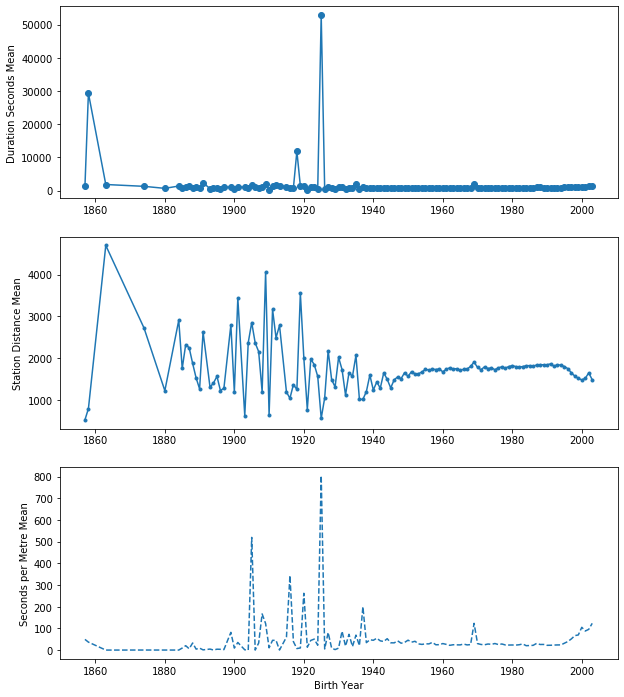

In [4]:
# Ordinary least squares (OLS) method
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,12))
# fig.suptitle('A table of 3 subplots')

ax1.plot(df_agg['Birth Year'], df_agg['Duration_Seconds_Mean'], 'o-')
ax1.set_ylabel('Duration Seconds Mean')

ax2.plot(df_agg['Birth Year'], df_agg['Station_Distance_Mean'], '.-')
ax2.set_ylabel('Station Distance Mean')

ax3.plot(df_agg['Birth Year'], df_agg['Seconds_per_Metre_Mean'], '--')
ax3.set_xlabel('Birth Year')
ax3.set_ylabel('Seconds per Metre Mean')
plt.savefig(os.path.join(cwd, "images", "OLS", "birth_year.jpg"),dpi = 150);

In [6]:
# Ordinary least squares (OLS) method
d = pd.DataFrame(df_agg, columns= ['Birth Year', 'Seconds_per_Metre_Mean'])
d_1994 = df_agg.loc[(d['Birth Year'] >= 1994)]
d_1994

d_1994.columns = ['Birth_Year', 'Duration_Seconds_Mean','Station_Distance_Mean','Seconds_per_Metre_Mean']
d_1994

,Birth_Year,Duration_Seconds_Mean,Station_Distance_Mean,Seconds_per_Metre_Mean
111,1994.0,897.800820,1831.534076,24.295149
112,1995.0,1003.015118,1801.565721,32.099801
113,1996.0,1047.318451,1749.639649,39.859011
114,1997.0,1091.904270,1650.620327,51.981319
115,1998.0,1134.710144,1571.233709,67.038651
116,1999.0,1102.518724,1516.278529,70.155602
117,2000.0,1157.789417,1482.638183,105.420350
118,2001.0,1173.112046,1517.062296,88.289010
119,2002.0,1416.746905,1650.065781,95.960582
120,2003.0,1558.796968,1484.844105,123.681816


In [211]:
# plt.plot(d_1994['Birth Year'], d_1994['Seconds_per_Metre_Mean'], 'o')
# plt.xlabel('Birth Year')
# plt.ylabel('Seconds_per_Metre_Mean')
# plt.show()

In [7]:
#From 1994, it has a strong correlation from the graph
# This will calculate the correlation matrix
cm = d_1994.corr(method = 'pearson')

# Print correlation matrix
cm

,Birth_Year,Duration_Seconds_Mean,Station_Distance_Mean,Seconds_per_Metre_Mean
Birth_Year,1.000000,0.910333,-0.820236,0.966004
Duration_Seconds_Mean,0.910333,1.000000,-0.608906,0.876320
Station_Distance_Mean,-0.820236,-0.608906,1.000000,-0.864553
Seconds_per_Metre_Mean,0.966004,0.876320,-0.864553,1.000000


In [8]:
# Initialize the regression model

m_1 = sm.ols('Duration_Seconds_Mean ~ Birth_Year', data = d_1994)

# Fit the regression model

m_1 = m_1.fit()

# Let's take a look at the regression parameters

m_1.params

# Calculate estimates of y

intercept_1, slope_1 = m_1.params
d_1994['y_est_1'] = intercept_1 + slope_1 * d_1994['Birth_Year']
print(intercept_1,slope_1)
print(m_1.summary())

-115596.66143880694 58.4213323618184
                              OLS Regression Results                             
Dep. Variable:     Duration_Seconds_Mean   R-squared:                       0.829
Model:                               OLS   Adj. R-squared:                  0.807
Method:                    Least Squares   F-statistic:                     38.70
Date:                   Mon, 14 Dec 2020   Prob (F-statistic):           0.000254
Time:                           07:30:32   Log-Likelihood:                -57.535
No. Observations:                     10   AIC:                             119.1
Df Residuals:                          8   BIC:                             119.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\danie\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\danie\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [9]:
# Initialize the regression model

m_2 = sm.ols('Station_Distance_Mean ~ Birth_Year', data = d_1994)

# Fit the regression model

m2_result = m_2.fit()

# Let's take a look at the regression parameters

m2_result.params

# Calculate estimates of y

intercept_2, slope_2 = m2_result.params
d_1994['y_est_2'] = intercept_2 + slope_2 * d_1994['Birth_Year']
print(intercept_2,slope_2)
print(m2_result.summary())

73117.3158320392 -35.77271333215338
                              OLS Regression Results                             
Dep. Variable:     Station_Distance_Mean   R-squared:                       0.673
Model:                               OLS   Adj. R-squared:                  0.632
Method:                    Least Squares   F-statistic:                     16.45
Date:                   Mon, 14 Dec 2020   Prob (F-statistic):            0.00366
Time:                           07:30:38   Log-Likelihood:                -56.908
No. Observations:                     10   AIC:                             117.8
Df Residuals:                          8   BIC:                             118.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\danie\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [10]:
# Initialize the regression model

m_3 = sm.ols('Seconds_per_Metre_Mean ~ Birth_Year', data = d_1994)

# Fit the regression model

m_3 = m_3.fit()

# Let's take a look at the regression parameters

m_3.params

# Calculate estimates of y

intercept_3, slope_3 = m_3.params
d_1994['y_est_3'] = intercept_3 + slope_3 * d_1994['Birth_Year']
print(intercept_3,slope_3)
print(m_3.summary())

-21091.08181953697 10.588421290254086
                              OLS Regression Results                              
Dep. Variable:     Seconds_per_Metre_Mean   R-squared:                       0.933
Model:                                OLS   Adj. R-squared:                  0.925
Method:                     Least Squares   F-statistic:                     111.7
Date:                    Mon, 14 Dec 2020   Prob (F-statistic):           5.61e-06
Time:                            07:30:42   Log-Likelihood:                -35.156
No. Observations:                      10   AIC:                             74.31
Df Residuals:                           8   BIC:                             74.92
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

C:\Users\danie\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


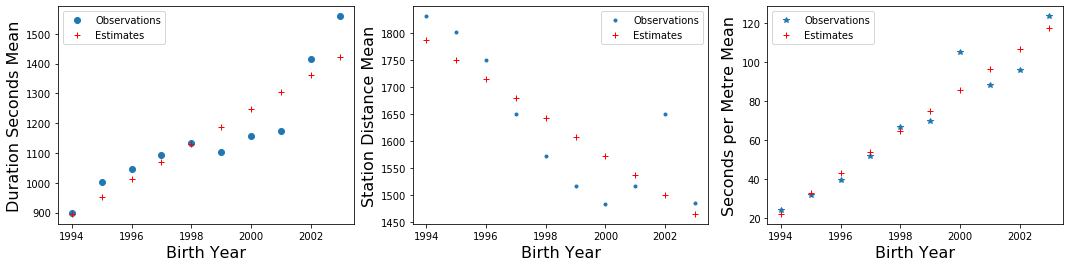

In [12]:
fig, (a1, a2, a3) = plt.subplots(1, 3,figsize=(18,4))
# fig.suptitle('A table of 3 subplots')

# Let's plot the estimates along the actual observations

a1.plot(d_1994['Birth_Year'], d_1994['Duration_Seconds_Mean'], 'o', label = 'Observations')
a1.set_xlabel('Birth Year', fontsize=16)

a1.set_ylabel('Duration Seconds Mean', fontsize=16)
# Draw estimates
a1.plot(d_1994['Birth_Year'], d_1994['y_est_1'], 'r+', label='Estimates')
# Add legend
a1.legend()

a2.plot(d_1994['Birth_Year'], d_1994['Station_Distance_Mean'], '.', label = 'Observations')
a2.set_xlabel('Birth Year', fontsize=16)
a2.set_ylabel('Station Distance Mean', fontsize=16)
# Draw estimates
a2.plot(d_1994['Birth_Year'], d_1994['y_est_2'], 'r+', label='Estimates')
# Add legend
a2.legend()

a3.plot(d_1994['Birth_Year'], d_1994['Seconds_per_Metre_Mean'], '*', label = 'Observations')
a3.set_xlabel('Birth Year', fontsize=16)
a3.set_ylabel('Seconds per Metre Mean', fontsize=16)
# Draw estimates
a3.plot(d_1994['Birth_Year'], d_1994['y_est_3'], 'r+', label='Estimates')
# Add legend
a3.legend()

plt.savefig(os.path.join(cwd, "images", "OLS", "OLS_correlation_birthyear.jpg"),dpi = 300);